
# Principal Component Analysis (PCA) and Its Variants  
### A Complete Practical Notebook Using Open & Valid Datasets

---

## Learning Objectives
This notebook provides a **clear, data-driven explanation** of:

- Principal Component Analysis (PCA)
- Eigenvalues and Eigenvectors (why & how)
- Feature Scaling (Min-Max vs StandardScaler)
- Kernel PCA
- Sparse PCA
- Comparison of PCA techniques

All experiments are conducted on **open, publicly accessible datasets**.

---



## Open & Valid Dataset Used

We use the **UCI Wine Dataset**, available through scikit-learn.

- Open source
- No authentication required
- Widely used in PCA research & teaching

Reference:
https://archive.ics.uci.edu/ml/datasets/wine

The dataset contains:
- 178 samples
- 13 numerical features
- 3 target classes


## 1. Import Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA


## 2. Load and Inspect Dataset

In [2]:

wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)



## 3. Why Scaling is Required Before PCA

PCA is based on **variance and covariance**.
Features with larger scales dominate the covariance matrix.

We compare:
- Min-Max Scaling
- Standard Scaling


In [3]:

# Min-Max Scaling
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

# Standard Scaling
standard = StandardScaler()
X_standard = standard.fit_transform(X)


In [14]:
print(X_minmax.shape)
print(X_standard.shape)

(178, 13)
(178, 13)



## 4. Eigenvalues & Eigenvectors – Mathematical Insight

PCA is computed by performing **Eigen Decomposition of the Covariance Matrix**.

- Eigenvectors → Directions of maximum variance
- Eigenvalues → Amount of variance along those directions


In [4]:

# Covariance Matrix
cov_matrix = np.cov(X_standard.T)

# Eigen Decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Explained Variance
explained_variance = eigen_values / np.sum(eigen_values)
explained_variance[:5]


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

### Explained Variance Plot

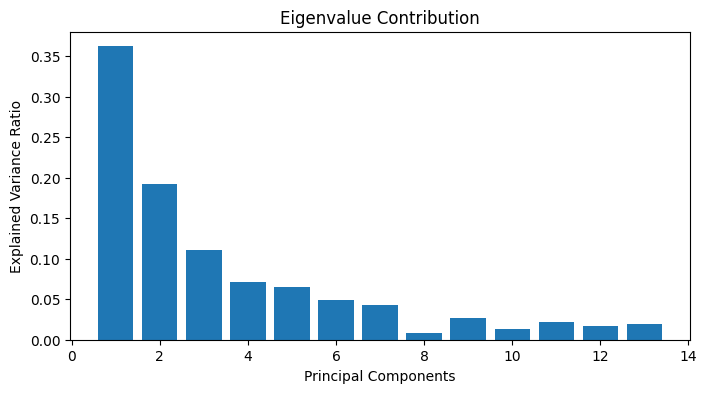

In [5]:

plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Eigenvalue Contribution")
plt.show()



## 5. Standard PCA (Linear PCA)


In [6]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standard)

pca.explained_variance_ratio_


array([0.36198848, 0.1920749 ])

In [16]:
print(X_pca.shape)
print(X_pca[:5])

(178, 2)
[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]]


### PCA Visualization

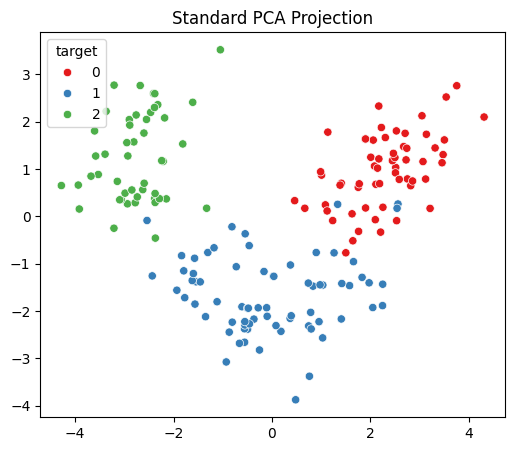

In [7]:

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="Set1")
plt.title("Standard PCA Projection")
plt.show()



## 6. Kernel PCA

Kernel PCA captures **non-linear relationships** using kernel functions.


In [8]:

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X_standard)


In [17]:
print(X_kpca.shape)
print(X_kpca[:5])

(178, 2)
[[ 0.47101778 -0.24126168]
 [ 0.34278996  0.00049383]
 [ 0.44265594 -0.15559992]
 [ 0.37991922 -0.26835799]
 [ 0.22554268 -0.04784464]]


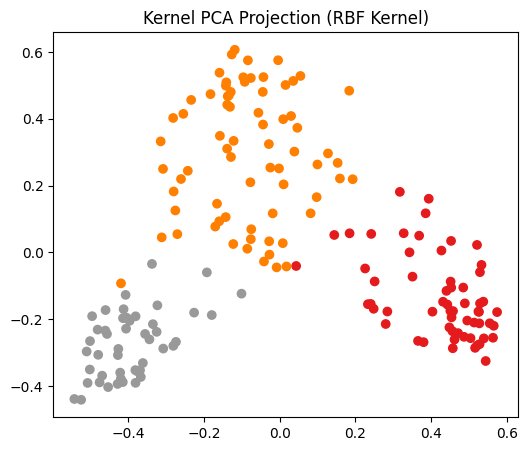

In [18]:

plt.figure(figsize=(6,5))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap='Set1')
plt.title("Kernel PCA Projection (RBF Kernel)")
plt.show()



## 7. Sparse PCA

Sparse PCA introduces sparsity:
- Improves interpretability
- Useful for high-dimensional data


In [10]:

spca = SparsePCA(n_components=2, random_state=42)
X_spca = spca.fit_transform(X_standard)


In [19]:
print(X_spca.shape)
print(X_spca[:5])

(178, 2)
[[ 3.22970651  1.47422042]
 [ 2.15354934 -0.24811303]
 [ 2.52990018  0.95748457]
 [ 3.74097199  2.71489354]
 [ 0.99196888  0.7730461 ]]


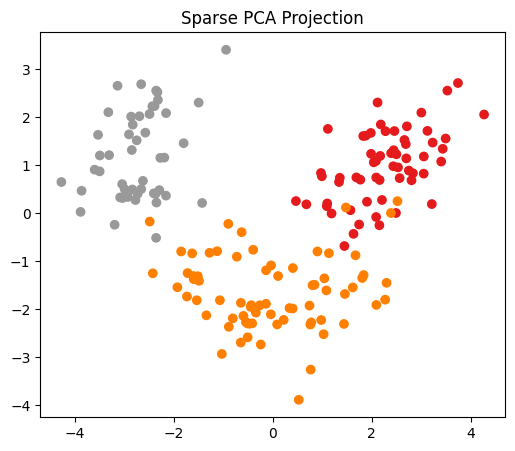

In [11]:

plt.figure(figsize=(6,5))
plt.scatter(X_spca[:,0], X_spca[:,1], c=y, cmap='Set1')
plt.title("Sparse PCA Projection")
plt.show()



## 9. Final Conclusions

- PCA relies on **Eigenvalues & Eigenvectors**
- Scaling is mandatory before PCA
- Kernel PCA handles non-linear structures
- Sparse PCA improves interpretability
- Choice of PCA depends on **data characteristics**



## 10. Complete Summary Reference Table

| Concept | Definition | Formula | Example | When to Use | Why | Use Case |
|---------|------------|---------|---------|-------------|-----|----------|
| **Standard Scaler** | Transforms features to have zero mean and unit variance | $z = \frac{x - \mu}{\sigma}$ | Feature with mean=100, std=15 → centered at 0, std=1 | When features have different scales and you need normal distribution | PCA relies on variance; unscaled features with larger ranges dominate | Most PCA applications, algorithms sensitive to feature magnitude |
| **Min-Max Scaler** | Scales features to a fixed range [0, 1] | $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$ | Values [10, 50] → scaled to [0, 1] | When you need bounded values or preserve zero entries | Preserves original distribution shape; useful for sparse data | Image processing, neural networks, when outliers are minimal |
| **Eigenvalues** | Scalar values representing the magnitude of variance along each principal component | $Av = \lambda v$ where $\lambda$ is the eigenvalue | λ₁=4.8, λ₂=2.3 → PC1 explains ~2× more variance than PC2 | To determine how many components to retain | Quantifies importance of each principal component | Dimensionality reduction decisions, scree plots |
| **Eigenvectors** | Directions (axes) of maximum variance in the feature space | $Av = \lambda v$ where $v$ is the eigenvector | Vector [0.5, 0.7, 0.2, ...] defines PC1 direction | To understand which features contribute to each component | Defines the new coordinate system for transformed data | Feature importance analysis, interpreting PCA loadings |
| **Standard PCA** | Linear dimensionality reduction via orthogonal transformation | $Z = XW$ where $W$ = eigenvector matrix | 13 wine features → 2 principal components | When data has linear relationships | Maximizes variance preservation with minimum components | Visualization, noise reduction, preprocessing for ML |
| **Kernel PCA** | Non-linear PCA using kernel trick to project data into higher-dimensional space | $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$ | RBF kernel captures circular/spiral patterns | When data has non-linear structure | Captures complex relationships that linear PCA misses | Non-linear manifolds, complex pattern recognition |
| **Sparse PCA** | PCA variant that enforces sparsity (zeros) in component loadings | $\min \|X - XBA^T\|^2 + \lambda\|B\|_1$ | Only 3 of 13 features contribute to PC1 | When interpretability is critical | Creates components with few non-zero loadings | Feature selection, explainable models, genomics |

